In [1]:
%reload_ext autoreload
%autoreload 2
%cd ../../

/home/hazzu/Code/thesis


In [18]:
import os, cv2
import os.path as osp
from tqdm import tqdm
from lib.face_detector import RetinaFaceDetector

face_detector = RetinaFaceDetector()
SELFIES_SINGLE_DIR = "datasets/selfies"
identities = os.listdir(SELFIES_SINGLE_DIR)

faces_size = []

for identity in tqdm(identities):
    identity_path = osp.join(SELFIES_SINGLE_DIR, identity)
    images_name = os.listdir(identity_path)

    for image_name in images_name:
        image_path = osp.join(identity_path, image_name)
        image = cv2.imread(image_path)

        faces = face_detector.detect(image)
        if len(faces) != 1:
            print(f"Ảnh chân dung {image_path} không hợp lệ ({len(faces)} khuôn mặt)")

    faces_size.append((faces[0].bbox["w"], faces[0].bbox["h"]))

Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'sdpa_kernel': '0', 'use_tf32': '1', 'fuse_conv_bias': '0', 'prefer_nhwc': '0', 'tunable_op_max_tuning_duration_ms': '0', 'enable_skip_layer_norm_strict_mode': '0', 'tunable_op_tuning_enable': '0', 'tunable_op_enable': '0', 'use_ep_level_unified_stream': '0', 'device_id': '0', 'has_user_compute_stream': '0', 'gpu_external_empty_cache': '0', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'cudnn_conv1d_pad_to_nc1d': '0', 'gpu_mem_limit': '18446744073709551615', 'gpu_external_alloc': '0', 'gpu_external_free': '0', 'arena_extend_strategy': 'kNextPowerOfTwo', 'do_copy_in_default_stream': '1', 'enable_cuda_graph': '0', 'user_compute_stream': '0', 'cudnn_conv_use_max_workspace': '1'}}
model ignore: /home/hazzu/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecution

100%|██████████| 94/94 [00:09<00:00,  9.56it/s]


In [19]:
print(f"Tổng số lượng sinh viên: {len(identities)} sinh viên")
print(f"Tổng số lượng ảnh chân dung: {len(faces_size)} ảnh")

Tổng số lượng sinh viên: 94 sinh viên
Tổng số lượng ảnh chân dung: 94 ảnh


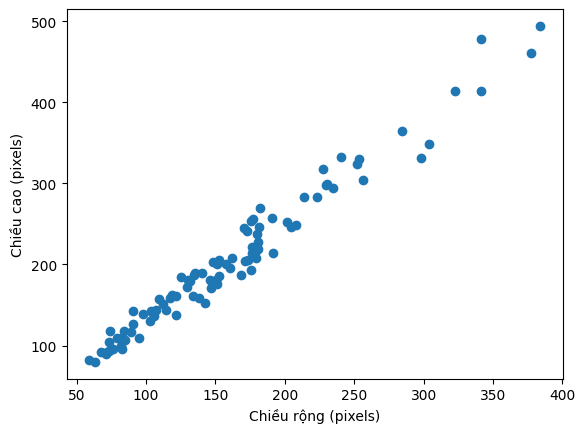

In [21]:
from matplotlib import pyplot as plt

plt.scatter(
    *zip(*faces_size),
    marker="o",
)
plt.xlabel("Chiều rộng (pixels)")
plt.ylabel("Chiều cao (pixels)")
plt.show()